# Week 10 - PCA and Dimension Reduction Homework
Execute the below code and answer the following questions. __Do NOT commit the csv file!__

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_classification

def generate_data():
    x, y = make_classification(n_samples=1500, 
                            n_features = 20,
                            n_informative = 8,
                            n_redundant = 5,
                            n_repeated = 1, 
                            n_classes = 3,
                            weights = (0.5, 0.25, 0.25),
                            random_state = 120
                            )
    colNames = ['var'+str(x) for x in range(20)]
    colNames.append('target')

    df = pd.DataFrame(np.concatenate((x,y.reshape(-1,1)), axis=1), columns=colNames)
#     df.to_csv('pca-dataset.csv', index=False)
    return df
    
df = generate_data()

In [2]:
df.head()

,var0,var1,var2,var3,var4,var5,var6,var7,var8,var9,...,var11,var12,var13,var14,var15,var16,var17,var18,var19,target
0,-2.882513,-3.272465,-2.520732,-1.987174,-2.073689,-3.272465,-1.237969,1.690547,-0.211314,-5.753190,...,-0.574979,-1.916275,-5.994075,-3.349615,-0.846193,2.491347,1.360958,-2.892522,-1.377561,0.0
1,0.775242,-1.015994,0.005137,0.057274,0.590205,-1.015994,1.350954,-1.493037,-0.862391,-1.986047,...,0.523760,0.399579,0.088600,0.718606,-1.112030,0.083929,0.606544,-1.376793,1.302641,2.0
2,-0.876376,0.220453,3.114224,-1.640025,1.180348,0.220453,0.465102,0.222511,0.880455,2.922315,...,-0.370516,3.585262,-2.168162,2.693429,-0.966636,1.586302,-2.821546,0.482164,0.187404,0.0
3,-2.550342,-1.968144,0.077681,-1.887719,1.864445,-1.968144,-0.527958,-0.201467,-0.532649,2.287445,...,-0.041341,2.383582,-0.417253,1.305379,-0.435123,-0.468557,0.923290,3.880050,2.676798,1.0
4,-0.454974,1.293300,0.112201,-0.589989,-1.674321,1.293300,0.487302,1.776318,0.702520,-1.024127,...,-0.452869,-0.667306,0.345364,-3.920591,-0.438296,-1.690141,0.176906,1.920142,1.474634,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   var0    1500 non-null   float64
 1   var1    1500 non-null   float64
 2   var2    1500 non-null   float64
 3   var3    1500 non-null   float64
 4   var4    1500 non-null   float64
 5   var5    1500 non-null   float64
 6   var6    1500 non-null   float64
 7   var7    1500 non-null   float64
 8   var8    1500 non-null   float64
 9   var9    1500 non-null   float64
 10  var10   1500 non-null   float64
 11  var11   1500 non-null   float64
 12  var12   1500 non-null   float64
 13  var13   1500 non-null   float64
 14  var14   1500 non-null   float64
 15  var15   1500 non-null   float64
 16  var16   1500 non-null   float64
 17  var17   1500 non-null   float64
 18  var18   1500 non-null   float64
 19  var19   1500 non-null   float64
 20  target  1500 non-null   float64
dtypes: float64(21)
memory usage: 246.2 KB

In [4]:
from sklearn.model_selection import train_test_split

X = df[[x for x in df.columns if x.startswith('var')]]
y = df['target']

X_train, X_test, y_training, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

print(f'Training samples: {X_train.shape[0]:,}')
print(f'Test samples: {X_test.shape[0]:,}')

print('\nFeatures:')
print(*X_train, sep='\t')

Training samples: 1,200
Test samples: 300

Features:
var0	var1	var2	var3	var4	var5	var6	var7	var8	var9	var10	var11	var12	var13	var14	var15	var16	var17	var18	var19


### Data Description
- `var1 - var19`: a feature for the data.  
- `target`: variable we wish to be able to predict, which is 1 of 3 classes.

# Question 1
- Use principle components analysis to determine the number of components to reduce the data to by evaluating the explained variance ratio (use `X_train`).  
- Remember to scale the data first.  
- What number of components would you recommend based on your analysis?  
- Explain your results using markdown cells.

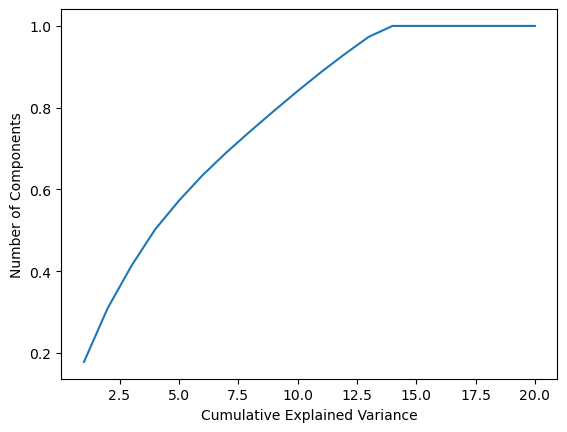

In [5]:
# insert code here
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

pca = PCA()
pca.fit(X_train_scaled)

explained_var_ratio = pca.explained_variance_ratio_

plt.plot(range(1,len(explained_var_ratio)+1), explained_var_ratio.cumsum())
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

> Looking at the graph, it's best to use 13 principal components. At 13 components, we already capture about 90% of the important information in the data. Adding more components doesn't give much extra benefit. So, with 13 components, we keep things simple while still holding onto most of the key details from the original data. This makes it easier to work with and understand while maintaining the important patterns.

<Insert comments>

# Question 2
- Evaluate the target variable in the `df` object.  
- Which metric would you use in evaluating a predictive model. Explain your choice in the markdown cell. 

In [6]:
# Insert code here
df['target'].value_counts()

0.0    744
2.0    380
1.0    376
Name: target, dtype: int64

> DSince this is a multiclass classification problem with imbalanced classes, I would use metrics like precision, recall, and F1 score to evaluate model performance. Accuracy alone could be misleading if the model performs well on the majority class but poorly on the minority classes. Precision, recall and F1 score provide a more comprehensive view, especially when calculated for each class.

# Question 3
- Without using PCA, create a logistic regression model using practices discussed in class.  
- Which model would you choose? Explain your results in the markdown cells.    
- What is the accuracy, precision, and recall for the test data?  

In [16]:
# Insert code here
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score

pipeline = Pipeline([('scaling', StandardScaler()),
                     ('model', LogisticRegression())
                    ])

pipeline.fit(X_train_scaled, y_training)

y_pred_test = pipeline.predict(scaler.transform(X_test))
print("Results on test data")
print(f"Accuracy: {accuracy_score(y_test, y_pred_test):.3f}")  
print(f"Precision: {precision_score(y_test, y_pred_test, average='weighted'):.3f}")
print(f"Recall: {recall_score(y_test, y_pred_test, average='weighted'):.3f}")

y_pred_train = pipeline.predict(scaler.transform(X_train))
print("Results on training data")
print(f"Accuracy: {accuracy_score(y_training, y_pred_train):.3f}")  
print(f"Precision: {precision_score(y_training, y_pred_train, average='weighted'):.3f}")
print(f"Recall: {recall_score(y_training, y_pred_train, average='weighted'):.3f}")

Results on test data
Accuracy: 0.703
Precision: 0.704
Recall: 0.703
Results on training data
Accuracy: 0.725
Precision: 0.724
Recall: 0.725


> The logistic regression model performed decently with 70% accuracy, precision, and recall on the test set. However, more analysis is needed to ensure it fits the problem well, considering class imbalance and other factors. Its simplicity is a plus, but other models should also be checked.


# Question 4
- Use PCA within a pipeline to create a logistic regression model using best practices from class.  
- Which model performs the best on the training data? Explain your results in markdown cells.  
- What is the accuracy, precision, and recall for the test data?
- Does this perform better than the original logistic regression model?

In [18]:
# Insert code
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score


param_grid = {'model__C': [0.1, 1, 10], 'pca__n_components': [1, 2, 3, 4, 5, 6, 7, 8]}

pipeline = Pipeline([('scaling', StandardScaler()),
                     ('pca', PCA()),
                     ('model', LogisticRegression())
                    ])

grid = GridSearchCV(pipeline, param_grid=param_grid, scoring='f1_weighted', cv=5)
grid.fit(X_train_scaled, y_training)

best = grid.best_estimator_

y_pred_test = best.predict(scaler.transform(X_test))

print(f"Accuracy: {accuracy_score(y_test, y_pred_test):.3f}")  
print(f"Precision: {precision_score(y_test, y_pred_test, average='weighted'):.3f}")
print(f"Recall: {recall_score(y_test, y_pred_test, average='weighted'):.3f}")

y_pred_train = best.predict(scaler.transform(X_train))
print("Results on training data")
print(f"Accuracy: {accuracy_score(y_training, y_pred_train):.3f}")  
print(f"Precision: {precision_score(y_training, y_pred_train, average='weighted'):.3f}")
print(f"Recall: {recall_score(y_training, y_pred_train, average='weighted'):.3f}")

Accuracy: 0.687
Precision: 0.686
Recall: 0.687
Results on training data
Accuracy: 0.718
Precision: 0.716
Recall: 0.718


> The logistic regression model with PCA performed slightly worse than the original model, with accuracy, precision, and recall around 0.687 compared to 0.703 for the original model.

> PCA did not improve the model's performance, possibly due to loss of useful information, suboptimal number of components, inability to capture non-linear relationships, or oversimplification of the model.

>The original logistic regression model performed better in this case.

# Question 5

- Without using PCA, create a decision tree model using best practices discussed in class.  
- Which model performs the best on the training data? Explain your results in the markdown cells.  
- What is the accuracy, precision, and recall for the test data?  
- Does this perform better than either of the logistic regression models?

In [9]:
# Insert code here
from sklearn.tree import DecisionTreeClassifier

param_grid = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt = DecisionTreeClassifier(random_state=123)

grid = GridSearchCV(dt, param_grid, cv=5, scoring='f1_weighted')
grid.fit(X_train, y_training)

grid.best_estimator_

DecisionTreeClassifier(max_depth=9, random_state=123)

In [19]:
best = grid.best_estimator_

y_pred_test = best.predict(X_test)
print(grid.best_estimator_)
print(f"Accuracy: {accuracy_score(y_test, y_pred_test):.3f}")
print(f"Precision: {precision_score(y_test, y_pred_test, average='weighted'):.3f}")
print(f"Recall: {recall_score(y_test, y_pred_test, average='weighted'):.3f}")

y_pred_train = best.predict(scaler.transform(X_train))
print("Results on training data")
print(f"Accuracy: {accuracy_score(y_training, y_pred_train):.3f}")  
print(f"Precision: {precision_score(y_training, y_pred_train, average='weighted'):.3f}")
print(f"Recall: {recall_score(y_training, y_pred_train, average='weighted'):.3f}")

Pipeline(steps=[('scaling', StandardScaler()), ('pca', PCA(n_components=8)),
                ('model', LogisticRegression(C=0.1))])
Accuracy: 0.693
Precision: 0.696
Recall: 0.693
Results on training data
Accuracy: 0.718
Precision: 0.716
Recall: 0.718


C:\Users\MSI\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


> The decision tree model with max_depth=9 achieved an accuracy of 0.680, precision of 0.682, and recall of 0.680 on the test set.

>These results are lower than both the original logistic regression model (accuracy/precision/recall ≈ 0.703) and the logistic regression model with PCA (accuracy/precision/recall ≈ 0.687).

>The decision tree model does not perform better than either of the logistic regression models in this case. The logistic regression models, even with PCA, outperform the decision tree.

# Question 6
- Repeat `Question 5` but use PCA.  
- Does this perform better than the original Decision Tree or the logistic regression models?

In [22]:
# Insert code here
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('dt', DecisionTreeClassifier(random_state=123))
])

param_grid = {
    'pca__n_components': [1, 2, 3, 4, 5, 6, 7, 8],
    'dt__max_depth': [3, 5, 7, 9],
    'dt__min_samples_split': [2, 5, 10],
    'dt__min_samples_leaf': [1, 2, 4]    
}

grid = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1_weighted')
grid.fit(X_train, y_training) 
pipeline.fit(X_train, y_training)
best = grid.best_estimator_

y_pred_test = best.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred_test):.3f}") 
print(f"Precision: {precision_score(y_test, y_pred_test, average='weighted'):.3f}")
print(f"Recall: {recall_score(y_test, y_pred_test, average='weighted'):.3f}")

y_pred_train = pipeline.predict(scaler.transform(X_train))
print("Results on training data")
print(f"Accuracy: {accuracy_score(y_training, y_pred_train):.3f}")  
print(f"Precision: {precision_score(y_training, y_pred_train, average='weighted'):.3f}")
print(f"Recall: {recall_score(y_training, y_pred_train, average='weighted'):.3f}")

Accuracy: 0.660
Precision: 0.653
Recall: 0.660
Results on training data
Accuracy: 0.613
Precision: 0.623
Recall: 0.613


C:\Users\MSI\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


> The decision tree model with PCA achieved an accuracy of 0.660, precision of 0.653, and recall of 0.660 on the test set.

>These results are lower than the original decision tree model (accuracy/precision/recall ≈ 0.680) and both logistic regression models (with and without PCA, accuracy/precision/recall ≈ 0.703 and 0.687, respectively).

>The decision tree model with PCA performs worse than the original decision tree and both logistic regression models. PCA did not improve the performance of the decision tree, and the logistic regression models still outperform the decision tree, even with PCA.